<div style="text-align:center">
    <img src="imagenes/spark_architecture.png" alt="spark_architecture">
</div>

# <center> Conceptos Apache SPARK

| Concepto         | Descripción                                                                                                                                                                       |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Driver Program   | El programa de la aplicación que se ejecuta en el master nodo y contiene la lógica de la aplicación Spark. Es el punto de entrada y coordina las operaciones en el clúster.   |
| Cluster Manager  | Componente externo que administra recursos y coordina la ejecución de trabajos y tareas en el clúster. Los ejemplos incluyen Mesos, YARN y el "Standalone Cluster Manager" de Spark. |
| Master Node      | Nodo que aloja el cluster manager y coordina la distribución de tareas en los worker nodes.                                                                                     |
| Worker Node      | Nodos que ejecutan las tareas de cómputo en el clúster. Pueden contener múltiples executors.                                                                                   |
| Executor         | Procesos que realizan las tareas de cómputo en el clúster. Cada worker node puede contener múltiples executors.                                                              |
| Slot             | Son unidades dentro de un executor que se utilizan para asignar y ejecutar tareas individuales.  pueden utilizar la memoria caché para almacenar datos temporales que necesitan para su procesamiento. |    
| Transformaciones | Operaciones aplicadas a RDDs o DataFrames para crear nuevos RDDs o modificar existentes. Son transformaciones perezosas (lazy).                                                  |
| Narrow Transformations | Transformaciones donde cada partición de entrada se mapea en una única partición de salida sin necesidad de reorganización.  |
| Wide Transformations   | Transformaciones que requieren reorganización y mezcla de particiones de entrada para generar particiones de salida.     |
| Acciones         | Operaciones que realizan cálculos y devuelven resultados a la aplicación. Desencadenan la ejecución de transformaciones y tareas en el clúster.                               |
| Transformaciones y Acciones | Las Transformaciones definen las operaciones que se aplicarán a los datos, creando un plan de ejecución. Las Acciones, cuando son invocadas en el controlador (Driver), ejecutan ese plan y retornan un resultado o efecto observable en el programa.|
| Plan Lógico | Es construido por el usuario al definir las transformaciones y acciones en el código Spark. Representa la secuencia abstracta de operaciones que se desean realizar en los datos.|
| Plan Físico | El optimizador interno de Spark utiliza este plan lógico como punto de partida para crear el plan físico. El plan físico considera la distribución de datos en el clúster, las características del hardware y otros factores para ejecutar las operaciones de manera eficiente y paralela.|
| Plan lógico y Físico| El plan lógico es la intención del usuario, mientras que el plan físico es la ejecución optimizada de esa intención en el clúster.|
| Plan de ejecución  | Es la descripción lógica y física de cómo se realizarán las operaciones en un conjunto de datos distribuidos. Define la secuencia de transformaciones y acciones que se aplicarán a los datos para obtener el resultado deseado. Cada operación, ya sea una transformación o una acción, se traduce en pasos dentro del plan de ejecución. |
| Task   | La unidad más pequeña de trabajo en Spark. Las tareas se ejecutan en los executors y procesan los datos en paralelo.  Cada tarea se asigna a un executor (proceso de trabajo) y ejecuta una porción específica de los datos en paralelo.  |
| Job   | Puede estar compuesto por múltiples tareas, Se crea un Job al ejecutar alguna Accion sobre un RDD o un dataframe. Es Una colección de operaciones (transformaciones y acciones) que Spark ejecuta en el clúster.|
| Cache | Almacenamiento temporal de datos en memoria o disco para acelerar el acceso a los datos y evitar recalculos. Cuando se realiza una acción en un RDD, Spark puede almacenar los resultados en caché para que en futuras operaciones no sea necesario volver a calcularlos desde cero.  |

<div style="text-align:center">
    <img src="imagenes/spark_compatible_languages.png" alt="spark_compatible_languages">
</div>

<div style="text-align:center">
    <img src="imagenes/spark_libraries.png" alt="spark_libraries">
</div>

| Biblioteca      | Estructura Utilizada                                    | Cuándo Usar                                            | Ventajas                                                                                           | Desventajas                                                                                   | Ejemplo de Código                                                                                                     |
|-----------------|---------------------------------------------------------|--------------------------------------------------------|---------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| Spark SQL       | DataFrames, Datasets, SQL Engine                       | - Para consultas y análisis SQL.<br>- Procesamiento de datos estructurados.<br>- Trabajo con datos tabulares. | - Soporte para SQL y operaciones de DataFrame.<br>- Integración con otras bibliotecas de Spark.<br>- Optimizaciones de consultas.<br>- Uso de funciones SQL para transformaciones. | - Limitado en comparación con bases de datos especializadas para ciertas operaciones SQL complejas.<br>- No es adecuado para operaciones de procesamiento en tiempo real.<br>- Puede requerir más recursos para ciertas consultas complejas. | from pyspark.sql import SparkSession<br><br>spark = SparkSession.builder.appName("Ejemplo Spark SQL").getOrCreate()<br>df = spark.read.csv("datos.csv", header=True, inferSchema=True)<br>df.createOrReplaceTempView("mi_tabla")<br>resultado = spark.sql("SELECT nombre, edad FROM mi_tabla WHERE edad > 25")<br>spark.stop() |
| Spark Streaming | DStream (Secuencia de micro-batch de RDDs)             | - Procesamiento de datos en tiempo real.<br>- Análisis de flujos de datos.<br>- Generación de alertas en tiempo real. | - Procesamiento y análisis en tiempo real.<br>- Soporte para ventana de tiempo y agregación.<br>- Integración con otras bibliotecas de Spark. | - Menos eficiente para operaciones de procesamiento por lotes.<br>- Escalado complejo en algunos escenarios.<br>- Requiere una gestión cuidadosa del estado y la latencia. | from pyspark import SparkContext<br>from pyspark.streaming import StreamingContext<br><br>sc = SparkContext("local", "Ejemplo Spark Streaming")<br>ssc = StreamingContext(sc, 1)<br>lines = ssc.socketTextStream("localhost", 9999)<br>words = lines.flatMap(lambda line: line.split(" "))<br>wordCounts = words.map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)<br>wordCounts.pprint()<br>ssc.start()<br>ssc.awaitTermination() |
| MLlib           | RDD, Algoritmos de Machine Learning                    | - Tareas de aprendizaje automático.<br>- Análisis de datos y modelado predictivo.<br>- Proyectos de análisis de datos grandes. | - Amplia gama de algoritmos de ML preconstruidos.<br>- Integración con otros módulos de Spark.<br>- Escalabilidad y procesamiento distribuido. | - Algunos algoritmos pueden no ser tan avanzados como en otras bibliotecas ML.<br>- Puede requerir más ajustes manuales en comparación con bibliotecas especializadas.<br>- No siempre es la mejor opción para algoritmos de aprendizaje profundo avanzados. | from pyspark import SparkContext<br>from pyspark.mllib.regression import LabeledPoint<br>from pyspark.mllib.tree import RandomForest<br><br>sc = SparkContext("local", "Ejemplo MLlib")<br>data = [(0.0, [0.0, 1.0]), (1.0, [1.0, 0.0])]  # Ejemplo de datos<br>rdd = sc.parallelize(data)<br>modelo = RandomForest.trainClassifier(rdd, numClasses=2, categoricalFeaturesInfo={},<br>                                     numTrees=1, featureSubsetStrategy="auto", impurity='gini',<br>                                     maxDepth=2, maxBins=32)<br> |
| GraphX          | Graph, VertexRDD, EdgeRDD, Algoritmos de Grafos        | - Análisis y procesamiento de grafos.<br>- Modelado de redes y relaciones.<br>- Algoritmos de minería de grafos. | - Eficiente para operaciones de grafos masivos.<br>- Integración con otros módulos de Spark.<br>- Procesamiento distribuido y escalabilidad. | - No es tan completo como otras bibliotecas de análisis de grafos en términos de algoritmos.<br>- Puede requerir un conocimiento más profundo de la teoría de grafos.<br>- Puede no ser tan rápido como bibliotecas especializadas en análisis de grafos. | from pyspark import SparkContext<br>from pyspark.graphx<br>import Graph<br><br>sc = SparkContext("local", "Ejemplo GraphX")<br>vertices = sc.parallelize([(1, "A"), (2, "B"), (3, "C")])<br>edges = sc.parallelize([(1, 2, "amigo"), (2, 3, "amigo")])<br>grafo = Graph(vertices, edges)<br>grados = grafo.degrees.collect() |

# **INSTALAR Y VALIDAR MODULOS Y PAQUETES REQUERIDOS**

In [ ]:
pip show pyspark

# **CREAR SESION DE SPARK**

In [ ]:
from pyspark.sql import SparkSession

spark_sesion = SparkSession  \
                  .builder  \
                  .master("local[*]")  \
                  .appName('PySpark-Example') \
                  .getOrCreate()

spark_sesion

# <center> ACCEDIENDO LA INTERFACE DE SPARK
# <center> http://localhost:4040

<div style="text-align:center">
    <img src="imagenes/spark_ui_general.png" alt="spark_ui">
</div>

| Pestaña           | Descripción                                                                                        |
|-------------------|---------------------------------------------------------------------------------------------------|
| Jobs              | Muestra la lista de jobs que se han ejecutado en el clúster. Puedes ver el progreso, el estado y los detalles de cada job, incluidas las tareas que lo componen.              |
| Stages            | Proporciona información detallada sobre los stages (etapas) que componen los jobs. Puedes ver el progreso de cada etapa, las tareas individuales y las estadísticas de tiempo.    |
| Storage           | Muestra el estado de almacenamiento y la utilización de la memoria y el disco en el clúster. Puedes ver qué RDDs están en caché y su tamaño.                          |
| Environment       | Ofrece información sobre el entorno de ejecución, como las variables de configuración y las propiedades utilizadas en la aplicación.                              |
| Executors         | Muestra una lista de ejecutores en el clúster, junto con su estado, recursos asignados, tareas en ejecución y finalizadas.                                      |
| SQL / DataFrame   | Proporciona información sobre las consultas SQL y las operaciones de DataFrame que se han realizado en la aplicación. Puedes ver el plan de ejecución y los detalles.  |

Cada pestaña en la Spark UI brinda información valiosa sobre diferentes aspectos del trabajo en el clúster, lo que permite supervisar, depurar y optimizar tus aplicaciones de Spark de manera efectiva.

# **TERMINAR UNA SESION DE SPARK**

In [ ]:
spark_sesion.stop()

# <center> **`SparkContext` vs `SparkSession`**

| Aspecto             | `SparkContext`                                      | `SparkSession`                                |
|---------------------|-----------------------------------------------------|-----------------------------------------------|
| Propósito           | Gestión de la conexión y los recursos de Spark.     | Punto de entrada principal para trabajar con Spark. |
| Disponibilidad      | Disponible desde versiones anteriores de Spark.     | Introducido en Spark 2.0 como punto de entrada simplificado. |
| Funciones clave     | - Crear RDDs (Resilient Distributed Datasets).<br>- Crear y configurar el SparkConf.<br>- Acceder a funcionalidades básicas de Spark.<br>- Controlar la paralelización y distribución.<br>- No admite algunas características de alto nivel.<br>- Menos amigable para la API.<br>- Requiere administración manual de recursos.<br>- No maneja automáticamente sesiones de Spark SQL. | - Crear DataFrames y Datasets.<br>- Configurar opciones de Spark de manera más sencilla.<br>- Acceder a funciones de SQL, DataFrame y Dataset.<br>- Integrar funciones de SQL, Streaming, MLlib, etc.<br>- Admite todas las características de Spark.<br>- API más moderna y fácil de usar.<br>- Administración automatizada de recursos.<br>- Manejo automático de sesiones de Spark SQL. |
| Uso en Spark SQL    | Requiere crear un `SQLContext` por separado.       | No es necesario crear un objeto adicional; `SparkSession` ya integra funcionalidad de Spark SQL. |
| Interoperabilidad   | Puede haber problemas al usar varios `SparkContext` en la misma aplicación. | Más eficiente y recomendado para usar con múltiples funciones y bibliotecas de Spark. |
| Integración con Hive | Requiere configuración adicional para acceder a Hive. | Integra automáticamente HiveContext para acceder a tablas de Hive. |
| Uso en Spark Shell  | Disponible automáticamente como `sc`.              | Disponible automáticamente como `spark`.   |

En versiones recientes de Spark, se recomienda utilizar `SparkSession` en lugar de `SparkContext`, ya que proporciona una interfaz más intuitiva y unificada para trabajar con todas las características de Spark.

# <center> **`TIPOS DE ABSTRACCIONES EN SPARK`**

<table>
  <tr>
    <th>Característica</th>
    <th>RDDs</th>
    <th>DataFrames</th>
    <th>Datasets</th>
    <th>Spark SQL Engine</th>
  </tr>
  <tr>
    <td>Paralelismo</td>
    <td>Manual</td>
    <td>Automático</td>
    <td>Automático</td>
    <td>Automático</td>
  </tr>
  <tr>
    <td>Particionamiento</td>
    <td>Recomendado Manual</td>
    <td>Recomendado Automático</td>
    <td>Recomendado Automático</td>
    <td>Recomendado Automático</td>
  </tr>
  <tr>
    <td>Tolerancia a fallos</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>Rendimiento</td>
    <td>Medio</td>
    <td>Alto</td>
    <td>Alto</td>
    <td>Alto</td>
  </tr>
  <tr>
    <td>Uso de memoria</td>
    <td>Alto</td>
    <td>Alto</td>
    <td>Medio</td>
    <td>Medio</td>
  </tr>
  <tr>
    <td>Optimización de memoria</td>
    <td>No</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>Consultas SQL</td>
    <td>No</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>Optimización de consultas</td>
    <td>No</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>Motor de Optimización</td>
    <td>No</td>
    <td>Catalyst Engine</td>
    <td>Catalyst Engine</td>
    <td>Catalyst Engine</td>
  </tr>
  <tr>
    <td>Interfaz</td>
    <td>Scala, Java, Python, R</td>
    <td>Scala, Java, Python, R</td>
    <td>Scala, Java</td>
    <td>SQL</td>
  </tr>
  <tr>
    <td>Tipo de API</td>
    <td>No tipado</td>
    <td>Semi-tipado</td>
    <td>Fuertemente tipado</td>
    <td>Fuertemente tipado</td>
  </tr>
  <tr>
    <td>Inmutabilidad</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
    <td>Sí</td>
  </tr>
  <tr>
    <td>Usa Schema</td>
    <td>No</td>
    <td>SI</td>
    <td>SI</td>
    <td>SI</td>
  </tr>
  <tr>
    <td>Conversión RDD</td>
    <td></td>
    <td><code>rdd.toDF()</code></td>
    <td><code>rdd.toDS()</code></td>
    <td></td>
  </tr>
  <tr>
    <td>Conversión DataFrames</td>
    <td><code>df.rdd</code></td>
    <td></td>
    <td><code>df.toDS()</code></td>
    <td><code>df.createOrReplaceTempView("mi_tabla")</code></td>
  </tr>
  <tr>
    <td>Conversión Datasets</td>
    <td><code>ds.rdd</code></td>
    <td><code>ds.toDF()</code></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>Cuándo Usar</td>
    <td>- Cuando se requiere un mayor control sobre la distribución

 y manipulación de los datos.<br>- Cuando se trabaja con tipos de datos no estructurados o no tabulares.<br>- Cuando se necesita compatibilidad con versiones anteriores de Spark.<br>- Cuando se realizan operaciones más complejas que no se pueden expresar fácilmente con DataFrames.<br>- Cuando se necesita una manipulación más directa de las particiones y la distribución de los datos.</td>
    <td>- Cuando se requiere una manipulación estructurada y fácil de datos.<br>- Cuando se desea aprovechar la optimización de Catalyst Engine y la interfaz SQL.<br>- Cuando se trabaja con datos estructurados en un entorno de Big Data.<br>- Cuando se necesita una alta tolerancia a fallos y optimización de memoria.<br>- Cuando se prefiere un equilibrio entre rendimiento y manipulación estructurada de datos.</td>
    <td>- Cuando se necesita una manipulación estructurada y fácil de datos.<br>- Cuando se desea aprovechar la optimización de Catalyst Engine y la interfaz SQL.<br>- Cuando se requiere un alto grado de tipado fuerte para garantizar la integridad de los datos.<br>- Cuando se busca un rendimiento óptimo en operaciones complejas.<br>- Cuando se trabaja con datos estructurados en un entorno de Big Data.</td>
    <td>- Cuando se desea trabajar con tipos de datos estructurados y fuertemente tipados.<br>- Cuando se busca una combinación de rendimiento y manipulación estructurada de datos.<br>- Cuando se necesita una interfaz más amigable para la manipulación y el análisis de datos.<br>- Cuando se requiere una alta integridad de datos debido al tipado fuerte.<br>- Cuando se trabaja con datos estructurados en un entorno de Big Data.</td>
  </tr>
  <tr>
    <td>Archivos Usados Regularmente</td>
    <td>Archivos de Sequence, <br> Archivos de Datos en Bruto, <br> Archivos de Audio, <br> Archivos de Video, <br> Archivos de Texto, Imágenes, <br> Archivos de Log, <br> Archivos de Registro, <br> Archivos de Código Fuente, <br> Archivos de Registro de Sensores</td>
    <td>JSON <br> CSV <br> Parquet <br> Avro <br> ORC <br> XML <br> XLSX <br> HTML <br> JSONL <br> PDF</td>
    <td>Bases de Datos <br> Delta Lake <br> Avro <br> ORC <br> XML <br> Parquet <br> JSON <br> JSONL</td>
    <td>Archivos CSV, <br> Archivos JSON, <br> Fuentes de Datos JDBC, <br> Fuentes de Datos Parquet, <br> Fuentes de Datos Avro, <br> Fuentes de Datos ORC, <br> Fuentes de Datos Delta Lake, <br> Fuentes de Datos Hive</td>
  </tr>
  <tr>
    <td>Ejemplo</td>
    <td><code>from pyspark import SparkContext<br>sc = SparkContext("local", "Ejemplo RDD")<br>rdd = sc.parallelize([1, 2, 3, 4, 5])<br>sc.stop()</code></td>
    <td><code>from pyspark.sql import SparkSession<br>spark = SparkSession.builder.appName("Ejemplo DataFrames").getOrCreate()<br>df = spark.read.csv("datos.csv", header=True, inferSchema=True)<br>spark.stop()</code></td>
    <td><code>from pyspark.sql import SparkSession<br>spark = SparkSession.builder.appName("Ejemplo Datasets").getOrCreate()<br>from pyspark.sql import Row<br>datos = [Row(nombre="Alice", edad=25), Row(nombre="Bob", edad=30)]<br>ds = spark.createDataFrame(datos)<br>spark.stop()</code></td>
    <td><code>from pyspark.sql import SparkSession<br>spark = SparkSession.builder.appName("Ejemplo Spark SQL").getOrCreate()<br>df.createOrReplaceTempView("mi_tabla")<br>resultado = spark.sql("SELECT nombre, edad FROM mi_tabla WHERE edad > 25")<br>spark.stop()</code></td>
  </tr>
</table>

# <center> ¿Qué es un **Resilient Distributed Dataset** (RDD) en Spark?
## Colección de elementos particionados entre los nodos del cluster que es tolerante a fallos y capaz de operar en paralelo.
- Inmutables: estos no se pueden modificar una vez han sido creados.
- Distribuidos: hace referencia a los RDD (Resilient Distributed Datasets) que están divididos en particiones que están repartidas en el clúster.
- Resilientes: en caso de perder una partición, esta se regenera automáticamente.

## Por otra parte, los RDDs se transforman, de manera que se crean nuevos RDD (Resilient Distributed Datasets) y estas transformaciones se aplican a los datos.

### En definitiva, un RDD (Resilient Distributed Datasets) es trabajar con el conjunto de datos. Las rdd transformations pueden ser:

- Narrow: no necesitan intercambio de información entre los nodos del clúster.
- Wide: necesitan intercambio de información entre los nodos del clúster.

<div style="text-align:center">
    <img src="imagenes/spark_rdd.png" alt="RDDs">
</div>

# <center> BROADCAST HASH JOIN & SHUFFLE HASH JOIN

| Aspecto               | Broadcast Hash Join                                         | Shuffle Hash Join                                        |
|-----------------------|-------------------------------------------------------------|---------------------------------------------------------|
| Aplicación            | RDDs pequeños.                                              | RDDs grandes.                                      |
| Tipo de Join          | Join entre un RDD pequeño y uno grande.                    | Join entre RDDs de cualquier tamaño.                   |
| Distribución de Datos | El RDD pequeño se transmite a todos los nodos.             | Se redistribuyen los datos para coincidir en particiones.|
| Uso de Memoria        | Utiliza memoria para almacenar el RDD pequeño en cada nodo.| Requiere menos memoria, ya que no almacena todo el RDD. |
| Ventajas              | - Eficiente para RDDs pequeños.<br>- Reduce la necesidad de shuffling.<br>- Apropiado cuando el RDD pequeño cabe en memoria.<br>- Menos costo en términos de tiempo en comparación con Shuffle Join. | - Funciona bien para RDDs grandes.<br>- Maneja RDDs de cualquier tamaño.<br>- Evita problemas de sobrecarga de memoria.<br>- Distribuye la carga de manera más uniforme.   |
| Desventajas           | - Limitado por el tamaño de memoria para el RDD pequeño.<br>- Ineficiente para RDDs pequeños si no hay espacio suficiente en memoria.<br>- No adecuado para RDDs pequeños que no quepan en memoria. | - Puede generar shuffling costoso para RDDs grandes.<br>- Puede ser menos eficiente para RDDs pequeños. |

<div style="text-align:center">
    <img src="imagenes/spark_broadcast_shuffle_hash_join.png" alt="spark_broadcast_hash_join">
</div>

<div style="text-align:center">
    <img src="imagenes/spark_core.png" alt="spark_core">
</div>

<div style="text-align:center">
    <img src="imagenes/spark_catalist.png" alt="spark_catalist">
</div>

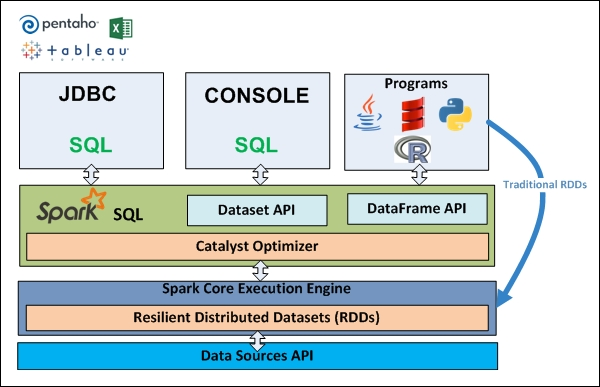

# **FUNCIONES PARA USO DE SESION**

In [ ]:
from utils.sesiones_spark import crear_sesion_spark
from utils.sesiones_spark import crear_spark_context_de_spark_sesion
from utils.sesiones_spark import crear_nueva_sesion_spark
from utils.sesiones_spark import crear_spark_context
from utils.sesiones_spark import cerrar_sesion_context

# **CREAR CONTEXTO DE SPARK Y SESION DE SPARK**

## **SparkContext** PARA RDD

In [ ]:
spark_context = crear_spark_context_de_spark_sesion()
spark_context

# **CREAR UN RDD VACIO**

In [ ]:
rdd_vacio = spark_context.emptyRDD()
rdd_vacio

# **CREAR UN RDD CON DATOS**

In [ ]:
from utils.muestras import generar_muestra

tamano_muestra = 10
muestra, labels = generar_muestra(tamano_muestra)

rdd = spark_context.parallelize(muestra)
rdd

# **RECUPERAR DATOS DE UN RDD**

In [ ]:
rdd_vacio.collect()

# VER LOS JOBs de los RDDs EN SPARK UI
### http://localhost:4040/jobs/

In [ ]:
rdd.collect()

# VER LOS Stages de los RDDs EN SPARK UI, cuando el collect retorna algo
### http://localhost:4040/stages

# OTRA FORMA DE **RECUPERAR LOS ELEMENTOS DE UN RDD**

## **RECUPERAR LOS PRIMEROS ELEMENTOS DE UN RDD**

In [ ]:
rdd.take(5)

## **RECUPERAR LOS ULTIMOS ELEMENTOS DE UN RDD**

In [ ]:
# crea una tupla de RDD e indice para ordenarlos basado en indices
rdd_con_indices = rdd.zipWithIndex()

# ordena las ROWS del RDD basado en los indices
reversed_rdd = rdd_con_indices.sortBy(lambda x: x[1], ascending=False)

# imprime las ROWs en orden inverso
for element in reversed_rdd.take(5):
    print(element[0])

# INVIERTE LOS ELEMENTOS DE CADA ROW

In [ ]:
# Invierte el RDD
inverted_rdd = rdd.map(lambda x: tuple(reversed(x)))

# Toma los últimos 3 elementos invertidos, que serán los últimos 3 elementos del RDD original
elements = inverted_rdd.take(5)
elements

In [ ]:
rdd.take(5)

# VER LOS RDDs EN SPARK UI, solo los persistidos NO los que se procesaron en cache
### http://localhost:4040/storage

In [ ]:
# Mantén el RDD en memoria para que sea visible en la Spark UI
rdd.persist()

# EJECUTAR LA ACCION, sino no se ve el RDD

In [ ]:
print(rdd.collect())

# ¿Qué es un DataFrame en Spark?
## Los DataFrames son conjuntos de datos distribuidos y organizados por columnas que pueden ser construidos a partir de diversas fuentes de datos como Cassandra, HIVE, Elastic Search, JDBC, estructuras de Pandas, ficheros csv, json, avro, etc. o directamente desde un RDD ya existente.

# CONVERTIR UN RDD EN UN DATAFRAME

In [ ]:
# Creamos un DataFrame y mostramos su esquema
dfRDD = rdd.toDF()

print(dfRDD.printSchema())
dfRDD.show()

# PONER NOMBRES A COLUMNAS DE UN DATAFRAME

In [ ]:
columnas = labels

# ASIGNA NOMBRES A LAS COLUMNAS
dfRDD = rdd.toDF(columnas)
print(dfRDD.printSchema())
dfRDD.show()

## **SparkSession** PARA DATAFRAMES Y DATASETS

In [ ]:
spark_sesion = crear_sesion_spark()
spark_sesion

# CREAR UN DATAFRAME DIRECTAMENTE

In [ ]:
df = spark_sesion.createDataFrame(data=muestra, schema=labels, verifySchema=True)
df.show()

# <center> SQL
# <center> http://localhost:4040/SQL/

In [ ]:
dfRDD.select("nombre",'salario').where("salario > 2000").orderBy("nombre").limit(5).show()

# <center> AGRUPAR

In [ ]:
from pyspark.sql.functions import avg, col

promedio_salarios_por_ciudad = dfRDD.filter(col("salario")>0).groupBy("seccion").agg(avg("salario").alias("SalarioPromedio"))
promedio_salarios_por_ciudad.show()

# <center> PLAN DE EJECUCION

In [ ]:
promedio_salarios_por_ciudad.explain(extended=True)

In [ ]:
from utils.muestras import generar_muestra

tamano_muestra = 10
muestra = generar_muestra(tamano_muestra)
for tupla in muestra:
    print(tupla)


In [ ]:
rdd = spark_context.parallelize(muestra)

In [ ]:
rdd.toDF()

# PLAN DE MIGRACION

# CREAR SESION SPARK

In [1]:
from pyspark.sql import SparkSession

# Crear una instancia de SparkSession
spark = SparkSession.builder.appName("Generar Datos Aleatorios").getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/13 02:45:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# GENERAR DATOS DE PRUEBA

In [2]:
import random
from datetime import datetime, timedelta

def generar_datos_aleatorios_con_regiones_y_productos_spark(spark, n):
    data = []
    fecha_base = datetime(2023, 1, 1)  # Fecha base con día 1 de enero de 2023

    # Lista de continentes y sus regiones
    continentes = {
        "America": ["Norte", "Sur", "Central"],
        "Europa": ["Norte", "Sur", "Este", "Oeste"],
        "Asia": ["Este", "Oeste", "Sur"],
        "Africa": ["Norte", "Sur", "Este", "Oeste"],
        "Oceania": ["Norte", "Sur"]
    }

    # Lista de productos
    productos = ["A", "E", "I", "O", "U"]

    for i in range(1, n + 1):
        # Generar una fecha con mes aleatorio y día 1
        mes_aleatorio = random.randint(1, 12)  # Genera un número entre 1 y 12 para el mes
        fecha = fecha_base.replace(month=mes_aleatorio)

        # Generar un valor de ventas aleatorio entre 0 y 100
        ventas = random.randint(50, 100)

        # Seleccionar aleatoriamente un continente
        continente = random.choice(list(continentes.keys()))

        # Seleccionar aleatoriamente una región dentro del continente
        region = random.choice(continentes[continente])

        # Seleccionar aleatoriamente un producto
        producto = random.choice(productos)

        data.append((i, fecha.strftime('%Y-%m-%d'), producto, ventas, region, continente))

    # Crear un DataFrame de Spark a partir de la lista de datos
    df = spark.createDataFrame(data, ["id", "date", "producto", "ventas", "region", "continente"])

    return df


# Ejemplo de uso para generar un DataFrame de 4 filas con productos
n = 100
datos_aleatorios_spark = generar_datos_aleatorios_con_regiones_y_productos_spark(spark, n)

# Mostrar el DataFrame generado
datos_aleatorios_spark.show()

+---+----------+--------+------+-------+----------+
| id|      date|producto|ventas| region|continente|
+---+----------+--------+------+-------+----------+
|  1|2023-11-01|       E|    77|  Norte|   Oceania|
|  2|2023-01-01|       O|    93|  Norte|   America|
|  3|2023-12-01|       O|    99|  Norte|    Europa|
|  4|2023-07-01|       U|    98|  Norte|   Oceania|
|  5|2023-02-01|       E|    95|  Oeste|      Asia|
|  6|2023-04-01|       A|    77|    Sur|   America|
|  7|2023-04-01|       E|    79|   Este|      Asia|
|  8|2023-11-01|       E|    69|  Norte|   America|
|  9|2023-02-01|       U|    68|   Este|      Asia|
| 10|2023-12-01|       O|    56|  Norte|    Europa|
| 11|2023-08-01|       I|    86|    Sur|   Oceania|
| 12|2023-01-01|       O|    79|    Sur|      Asia|
| 13|2023-11-01|       U|    66|  Oeste|      Asia|
| 14|2023-02-01|       E|    87|  Oeste|      Asia|
| 15|2023-07-01|       U|    66|Central|   America|
| 16|2023-01-01|       E|    73|  Norte|    Africa|
| 17|2023-06

# PARTICIONAR BASADO EN COLUMNA

In [4]:
def particionar_basado_en_columnas(spark_dataframe, lista_columnas_particionar, formato_particion_archivo, path_a_exportar):

  # Particionar el DataFrame y guardar en formato requerido
  spark_dataframe.write.partitionBy(lista_columnas_particionar).mode("overwrite").format(formato_particion_archivo).save(path_a_exportar)

  print(f'se ha completado las particiones usando {lista_columnas_particionar}, como columnas para la division de los datos')
  print(f'los archivos particionados estan en el directorio : {path_a_exportar}')

# dataframe de spark para usar en las particiones
spark_dataframe = datos_aleatorios_spark

# orden de las columnas a usar para el particionado
lista_columnas_particionar = ["producto", "date","continente", "region"]

# Especificar el formato a usar para exportar
formato_particion_archivo = 'parquet'

# Especificar la ruta de destino
path_a_exportar = '/content/particionar_por_columnas'

# particionar basaso en los anteriores parametros
particionar_basado_en_columnas(spark_dataframe, lista_columnas_particionar, formato_particion_archivo, path_a_exportar)

se ha completado las particiones usando ['producto', 'date', 'continente', 'region'], como columnas para la division de los datos
los archivos particionados estan en el directorio : /content/particionar_por_columnas


# PARTICIONAR BASADO EN UN NUMERO DEFINIDO DE PARTICIONES

In [5]:
def particionar_basado_en_total_particiones_definidas(spark_dataframe, formato_particion_archivo, path_a_exportar, maximas_particiones = 2):

  # Particionar el DataFrame y guardar en formato Avro
  spark_dataframe_particionado = spark_dataframe.repartition(maximas_particiones)

  # Guarda el DataFrame en la ruta especificada en el formato requerido
  spark_dataframe_particionado.write.mode("overwrite").format(formato_particion_archivo).save(path_a_exportar)

  print(f'se ha completado las particiones usando un total de {maximas_particiones} particiones')
  print(f'los archivos particionados estan en el directorio : {path_a_exportar}')

# dataframe de spark para usar en las particiones
spark_dataframe = datos_aleatorios_spark

# Especificar el formato a usar para exportar
formato_particion_archivo = 'orc'

# Especificar la ruta de destino
path_a_exportar = '/content/particionar_por_particiones_definidas'

# orden de las columnas a usar para el particionado
maximas_particiones = 5

# particionar basaso en los anteriores parametros
particionar_basado_en_total_particiones_definidas(spark_dataframe, formato_particion_archivo, path_a_exportar, maximas_particiones)

se ha completado las particiones usando un total de 5 particiones
los archivos particionados estan en el directorio : /content/particionar_por_particiones_definidas


# GENERADOR DE SHA-512 DESDE UN ARCHIVO, DIRECTORIO O DATAFRAME

In [6]:
import hashlib

def generar_sha_archivo(ruta_del_archivo=None, dataframe=None):

  if ruta_del_archivo:
    # Leer el archivo original
    with open(ruta_archivo_original, "rb") as f:
        contenido_original = f.read()
    # Calcular el hash SHA-512 del contenido original
    hash_calculado = hashlib.sha512(contenido_original).hexdigest()

  elif dataframe:
      # Asegurarse de que el contenido sea de tipo bytes antes de calcular el hash
      contenido_bytes = dataframe.encode()
      # Calcular el hash SHA-512 del contenido original
      hash_calculado = hashlib.sha512(contenido_bytes).hexdigest()

  return hash_calculado

# LEER ARCHIVOS Y CREAR DATAFRAMES

In [7]:
def leer_archivo_y_crear_dataframe(instancia_spark, formato_particion_archivo, path_a_leer, header=True, inferSchema=True):

  dataframe_creado = instancia_spark.read.format(formato_particion_archivo).option("header", header).option("inferSchema", inferSchema).load(path_a_leer)

  return dataframe_creado

# CREAR UN ARCHIVO A PARTIR DE UN DATAFRAME

In [8]:
def reconstruir_archivo_desde_particiones(spark_dataframe, formato_particion_archivo, path_a_exportar_reconstruido):

  # Guarda el DataFrame en la ruta especificada en el formato requerido
  spark_dataframe.write.mode("overwrite").format(formato_particion_archivo).save(path_a_exportar_reconstruido)
  print(f'el archivo reconstruido estan en el directorio : {path_a_exportar_reconstruido}')

# Paso 1: Leer un Archivo de X Megabytes y Crear un dataframe de Spark

In [ ]:
instancia_spark = spark

# ruta donde esta el archivo a leer
ruta_archivo_original = "/content/sample_data/california_housing_train.csv"
formato_particion_archivo = 'csv'
path_a_leer = ruta_archivo_original

df_original = leer_archivo_y_crear_dataframe(instancia_spark, formato_particion_archivo, path_a_leer, header=True, inferSchema=True)
df_original.show()

# Paso 2: Dividir el Archivo y Guardar las Particiones en el formato de particiones definido

In [ ]:
# dataframe de spark para usar en las particiones
spark_dataframe = df_original

# Especificar el formato a usar para exportar
formato_particion_archivo = 'orc'

# Especificar la ruta de destino
path_a_exportar = '/content/particionar_por_particiones_definidas_archivo'

# orden de las columnas a usar para el particionado
maximas_particiones = 5

# particionar basaso en los anteriores parametros
particionar_basado_en_total_particiones_definidas(spark_dataframe, formato_particion_archivo, path_a_exportar, maximas_particiones)

# Paso 3: Reconstruir el Archivo ORIGINAL EN UN DATAFRAME

In [ ]:
instancia_spark = spark
path_a_leer = path_a_exportar

df_reconstruido = leer_archivo_y_crear_dataframe(instancia_spark, formato_particion_archivo, path_a_leer, header=True, inferSchema=True)
df_reconstruido.show()

# PASO 4 CREA EL ARCHIVO A PARTIR DEL DATAFRAME PARA COMPARAR HASH

In [ ]:
spark_dataframe = df_reconstruido

formato_particion_archivo = 'csv'

# Paso 4: Escribir el DataFrame reconstruido en un archivo con el formato elegido
ruta_archivo_reconstruido = f"/content/archivos_generado/archivo_reconstruido.{formato_particion_archivo}"
path_a_exportar_reconstruido = ruta_archivo_reconstruido

reconstruir_archivo_desde_particiones(spark_dataframe, formato_particion_archivo, path_a_exportar_reconstruido)

# PASO 5 CALCULA LOS HASHES DE LOS ARCHIVO ORIGINAL Y EL RECONSTRUIDO DE PARTICIONES
# COMPARA LOS HASH PARA VALIDAR LA INTEGRIDAD DE LA INFORMACION

In [ ]:
# Paso 1: Calcular el hash del archivo original
hash_original = generar_sha_archivo(ruta_archivo_original)
print("Hash Archivo Original:", hash_original)

df_reconstruido = leer_archivo_y_crear_dataframe(instancia_spark, formato_particion_archivo, path_a_leer, header=True, inferSchema=True)

# Paso 5: Calcular el hash del archivo CSV reconstruido
hash_reconstruido = generar_sha_archivo(ruta_del_archivo=ruta_archivo_reconstruido)
print("Hash Archivo Reconstruido:", hash_reconstruido)

# Paso 4: Comparar los hashes para validar la integridad
if hash_original == hash_reconstruido:
    print("\nLa reconstrucción es exitosa. Los hashes coinciden.")
else:
    print("\nLa reconstrucción ha fallado. Los hashes no coinciden.")